# Problem Set 1
**AS.171.402: Applied Quantum Information (Spring 2022)**

**Due Date: Feb 15, 2022**

In this problem set, we will simulate single qubit dynamics using `qiskit`. In Problem 1, we introduced a Hamiltonian, and obtained analytically the dynamics of the qubit. Quantum Circuits in qiskit directly implement unitary rotations. So we will use these Unitary rotations to simulate the effective dynamics.

Since we are intersted in single qubit dynamics, the unitary operators (or gates) that are of interest to are, 
`rx`, `ry`, `rz` and `u` gates.

In [2]:
from math import pi
from qiskit import *
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend('aer_simulator_statevector') # setting up the qiskit simulator

# Problem 1 (a) Creating a $|+\rangle$ state
We start by reproducing the results of Problem 1(a). Here, we set $\Omega_y=\Omega=1$, $\omega=\Omega_x=0$. 
Create a single qubit circuit that evolves the the qubit under this Hamiltonian for at time $t_g$. Plot the time dependence of the state and  find $t_g$ that creates a $|+\rangle$ state. 

Hint: Use the `ry` gate.

(i) Create a function that outputs the requisite circuit.

In [3]:
def evolve_with_OmegaY(Omega,tg):
    '''
    This function takes as input, Ω and tg, and returns the circuit that applies a unitary 
    correspoding to the Hamiltonian in Problem 1 (a).
    '''
    circ = QuantumCircuit(1) #Initialize single qubit quantum circuit
    '''
    Insert Code here
    '''
    circ.ry(tg*Omega,0)
    circ.draw('mpl')
    return circ.copy()

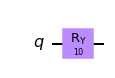

In [4]:
circ=evolve_with_OmegaY(1,10)
circ.draw('mpl')

(ii) Apply the circuit for different time, and plot the time dependence of the probabilites in $|0\rangle$ and $|1\rangle$ states

0.0


'Create a Figure that shows the probabilities of |0> and |1> as a function of time'

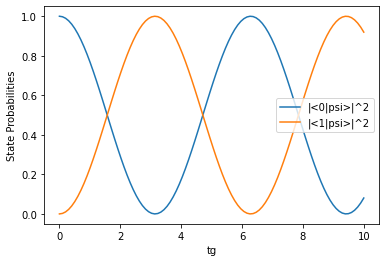

In [5]:
Omega=1
tgs=np.linspace(0,10,100)
ouputstatevectors=[]
for tg in tgs:
    circ1a=evolve_with_OmegaY(Omega,tg)
    circ1a.save_statevector()
    circ1a.draw()
    result = backend.run(circ1a).result()
    ouputstatevectors.append(result.get_statevector())
    if np.abs(ouputstatevectors[-1][0])**2==1:
        print(tg)
plt.plot(tgs, [np.abs(vec[0])**2 for vec in ouputstatevectors],label=r'|<0|psi>|^2')
plt.plot(tgs, [np.abs(vec[1])**2 for vec in ouputstatevectors],label=r'|<1|psi>|^2')
plt.xlabel('tg')
plt.ylabel('State Probabilities')
plt.legend()
'''Create a Figure that shows the probabilities of |0> and |1> as a function of time'''

(iii) Create a function that takes input as the $\Omega_y$, and returns a time will generate a circuit that produces the $|+\rangle$ state

In [6]:
import math
def get_tg_for_plus_state(Omega):
    '''
    Function returns the time it takes to generate a |+> state
    '''
    tg=math.pi/(2*Omega)
    '''
    Insert Code here
    '''
    return tg

See that the Bloch Sphere corresponds to a $|+\rangle$ State

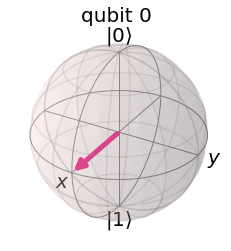

In [7]:
Omega=1
tplus=get_tg_for_plus_state(Omega)
circ1a1=evolve_with_OmegaY(Omega,tplus)
circ1a1.save_statevector()
result = backend.run(circ1a1).result()
plusstate=result.get_statevector()
plot_bloch_multivector(plusstate)

# Problem 1 (b) Evolution of the $|+\rangle$ State
Next we simulate the evolution of $|+\rangle$ under $H=\frac{\omega}{2} \hat{Z}$.

For this problem, we generate a $|+\rangle$ state and then evolve under the Hamiltonian. We use the circuit from the previous part to generate the $|+\rangle$ state.

We use $\omega=5$

In [8]:
def evolve_with_omegaZ(omega,tf):
    '''
    Returns a circuit that evolves it with H=ω/2 Z for time tf
    returns a circuit
    '''
    circ_test=QuantumCircuit(1)
    '''
    Insert Code here
    '''
    circ_test.rz(tf*omega,0)
    return circ_test.copy()

In [9]:
Omega=5
tplus=get_tg_for_plus_state(Omega)
circ1a1=evolve_with_OmegaY(Omega,tplus)
circ1a1=evolve_with_omegaZ(Omega,math.pi,circ1a1)
circ1a1.save_statevector()
result = backend.run(circ1a1).result()
plusstate=result.get_statevector()
plot_bloch_multivector(plusstate)

TypeError: evolve_with_omegaZ() takes 2 positional arguments but 3 were given

Text(0, 0.5, '|<+|psi>|^2')

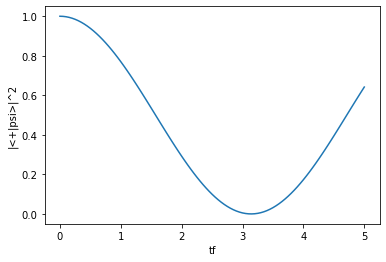

In [10]:
# First create the |+> state. We use the circuit from previous part
plus_state_circ=evolve_with_OmegaY(Omega,get_tg_for_plus_state(Omega))
#Create circuits to simulate evolution with H=ω/2 Z.
omega=1
tfs=np.linspace(0,5,101)
outputstates1b=[]
for tf in tfs:
    #Evolve
    circ_evolve=evolve_with_omegaZ(omega,tf)
    circ1b=plus_state_circ.compose(circ_evolve,[0])
    circ1b.save_statevector()
    outputstates1b.append(backend.run(circ1b).result().get_statevector())
    
# Plot overlap with the plus state
plusstate=outputstates1b[0] 
plt.plot(tfs, [np.abs(np.dot(plusstate.conjugate(),vec))**2 for vec in outputstates1b],label=r'|<+|psi>|^2')
plt.xlabel('tf')
plt.ylabel('|<+|psi>|^2')

In [11]:
def evolve_with_OmegaX(Omega,tg):
    '''
    This function takes as input, Ω and tg, and returns the circuit that applies a unitary 
    correspoding to the Hamiltonian in Problem 1 (a).
    '''
    circ = QuantumCircuit(1) #Initialize single qubit quantum circuit
    '''
    Insert Code here
    '''
    circ.rz(tg*Omega,0)
    circ.draw('mpl')
    return circ.copy()

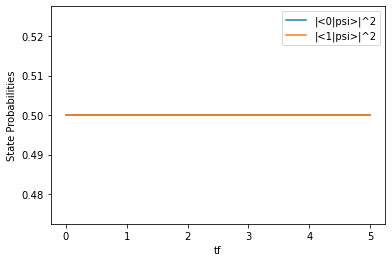

In [12]:
# First create the |+> state. We use the circuit from previous part
plus_state_circ=evolve_with_OmegaY(Omega,get_tg_for_plus_state(Omega))
#Create circuits to simulate evolution with H=ω/2 Z.
omega=5
tfs=np.linspace(0,5,101)
ouputstatevectors=[]
for tf in tfs:
    #Evolve
    circ_evolve=evolve_with_OmegaX(omega,tf)
    circ1c=plus_state_circ.compose(circ_evolve,[0])
    circ1c.save_statevector()
    ouputstatevectors.append(backend.run(circ1c).result().get_statevector())
plt.plot(tfs, [np.abs(vec[0])**2 for vec in ouputstatevectors],label=r'|<0|psi>|^2')
plt.plot(tfs, [np.abs(vec[1])**2 for vec in ouputstatevectors],label=r'|<1|psi>|^2')
plt.xlabel('tf')
plt.ylabel('State Probabilities')
plt.legend()

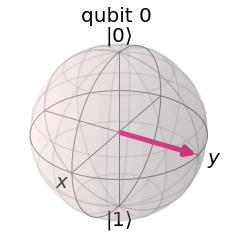

In [16]:
Omega=1
tplus=get_tg_for_plus_state(Omega)
plus_state_circ = evolve_with_OmegaY(Omega,tplus)
circ1a1=evolve_with_OmegaX(Omega,math.pi/2)
circ1a1=plus_state_circ.compose(circ1a1,[0])
circ1a1.save_statevector()
result = backend.run(circ1a1).result()
plusstate=result.get_statevector()
plot_bloch_multivector(plusstate)